In [1]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
import random

from utils.data_loaders import get_wake_datasets
from utils.evaluation import test_sklearn_model
import utils.plotting as plotting

In [2]:
FACTORS_FOLDER = "discr_factors_x2_30_y-2_2_step0.125_TIstep0.01_CTstep0.01"
DATA_FOLDER = f"data/{FACTORS_FOLDER}/"
CONSIDER_WS = False
COORDS_AS_INPUT = True # univariate setting
MAX_DEPTH = None

#FOURIER_COMPONENTS = 2

MODEL_NAME = f"univariate_DT_max-depth{MAX_DEPTH}"
if CONSIDER_WS:
    MODEL_NAME += "_consider_ws"
print(MODEL_NAME)

univariate_DT_max-depthNone


In [3]:
train_dataset, valid_dataset, test_dataset = get_wake_datasets(DATA_FOLDER,
                                                               consider_ws=CONSIDER_WS,
                                                               coords_as_input=COORDS_AS_INPUT,
                                                               train_perc=0.6,
                                                               validation_perc=0.2,
                                                               test_perc=0.2)

train_x, train_y = train_dataset.inputs, train_dataset.outputs
print("Train shapes: ", train_x.shape, train_y.shape)

grid_size = train_dataset.num_cells
print(f"{grid_size=}")

Train shapes:  torch.Size([36986880, 4]) torch.Size([36986880, 1])
grid_size=7168


In [4]:
train_x, train_y = train_dataset.inputs, train_dataset.outputs
print("Train shapes: ", train_x.shape, train_y.shape)
train_size = train_x.shape[0]

test_x, test_y = test_dataset.inputs, test_dataset.outputs
print("Test shapes: ", test_x.shape, test_y.shape)
test_size = test_x.shape[0]

valid_x, valid_y = valid_dataset.inputs, valid_dataset.outputs
print("Valid shapes: ", valid_x.shape, valid_y.shape)
valid_size = valid_x.shape[0]

size = train_size + test_size + valid_size
print(train_size/size, test_size/size, valid_size/size)

Train shapes:  torch.Size([36986880, 4]) torch.Size([36986880, 1])
Test shapes:  torch.Size([12328960, 4]) torch.Size([12328960, 1])
Valid shapes:  torch.Size([12328960, 4]) torch.Size([12328960, 1])
0.6 0.2 0.2


# Training

In [5]:
model = DecisionTreeRegressor(max_depth=MAX_DEPTH)
model.fit(train_x, train_y)
#tree_text = export_text(model)
#print(tree_text)

DecisionTreeRegressor()

In [6]:
importances = model.feature_importances_
for featurenum, importance in enumerate(importances):
    featurename = train_dataset.featurenum_to_featurename(featurenum)
    print(f"{featurename} feature importance={importance}")

ti feature importance=0.20932856791765295
ct feature importance=0.20196855266985203
x/D feature importance=0.16402732280439838
y/D feature importance=0.4246755566080967


In [9]:
model_description=MODEL_NAME+"_"+FACTORS_FOLDER
     #TODO "new splitting technique excluding a range of TIs and CTs -> trained only in range (0, 0.56/58) and tested only in range (0.78/0.8, 0.94/0.96)"

test_sklearn_model(model, test_x, test_y,
                   model_description=model_description,
                   save_results=True)

Test results for univariate_DT_max-depthNone_discr_factors_x2_30_y-2_2_step0.125_TIstep0.01_CTstep0.01
r2_score=0.9994290470960111
explained_variance_score=0.999429248098284
mean_squared_error=6.59023265882325e-07
mean_absolute_error=0.00027500685626492176
median_absolute_error=0.0
mean_absolute_percentage_error=6706488049.710938
Prediction time=5.362461208121425e-07s


max in plotting tensor(0.0059)


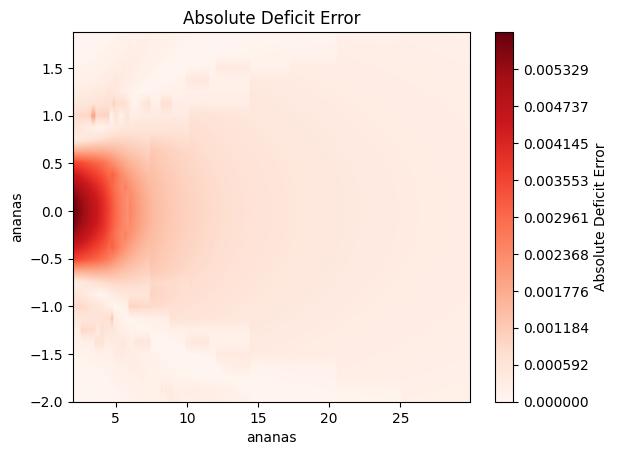

max in plotting tensor(0.0012)


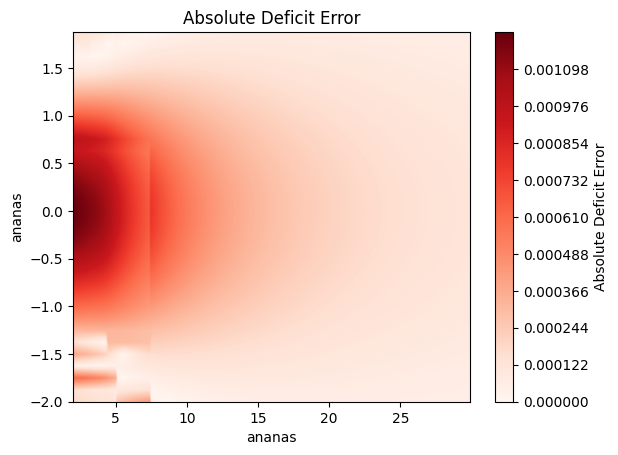

max in plotting tensor(0.)


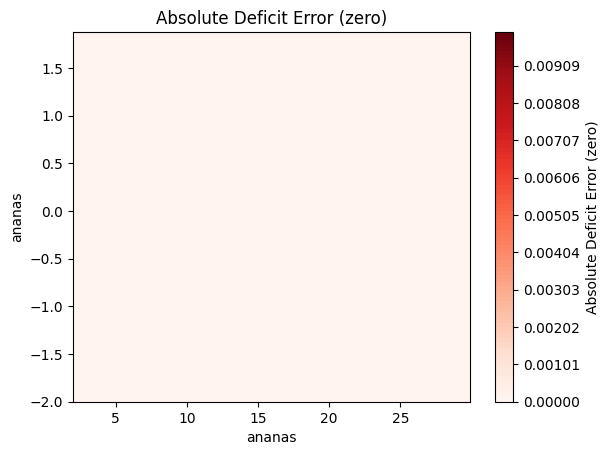

max in plotting tensor(0.)


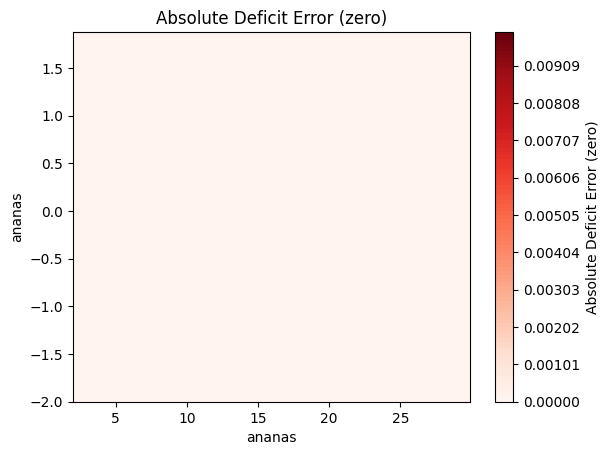

max in plotting tensor(0.0062)


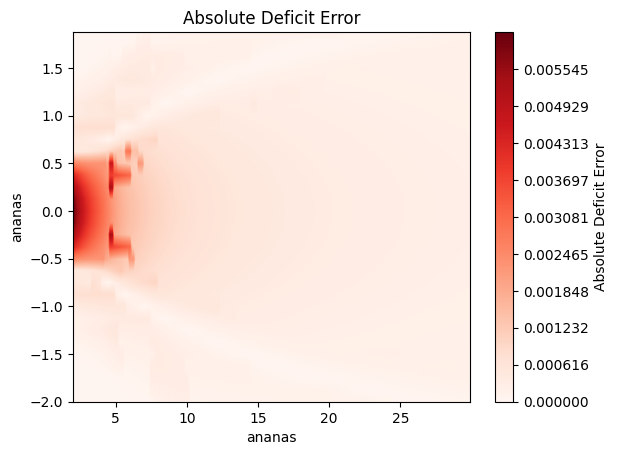

max in plotting tensor(0.0028)


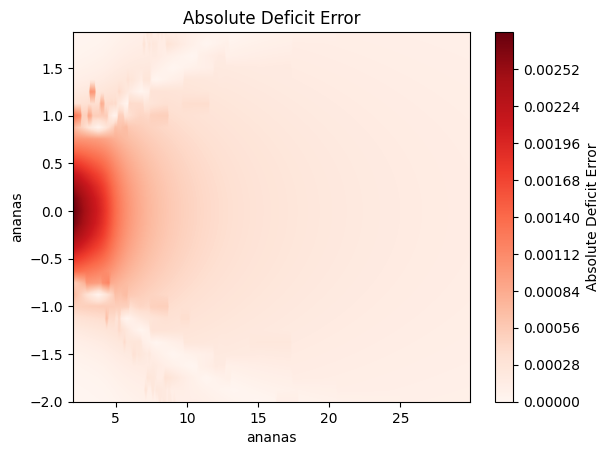

max in plotting tensor(0.)


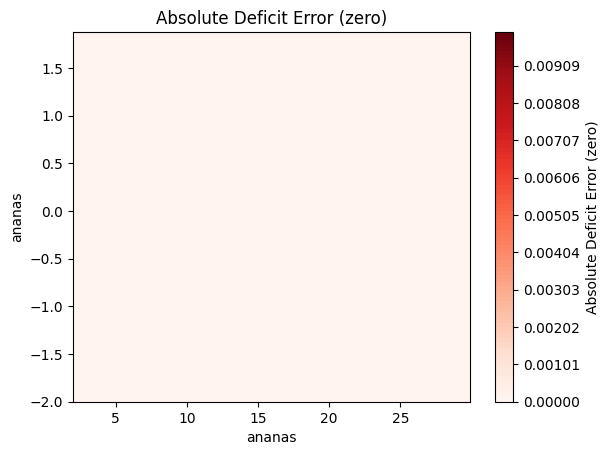

max in plotting tensor(0.0081)


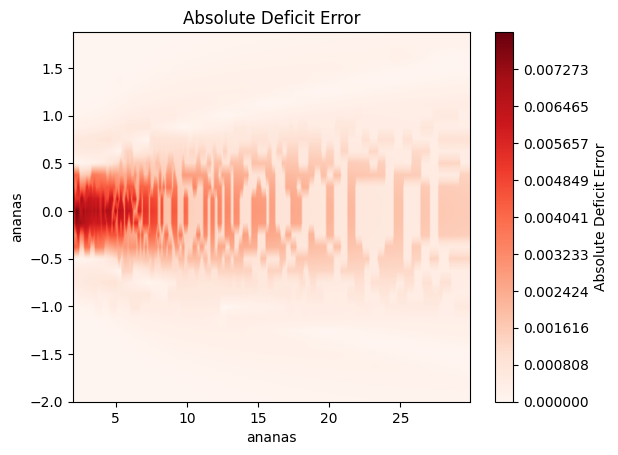

max in plotting tensor(0.0139)


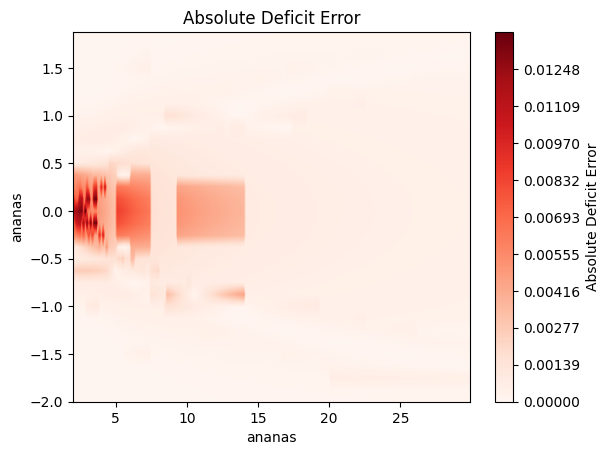

max in plotting tensor(0.0036)


KeyboardInterrupt: 

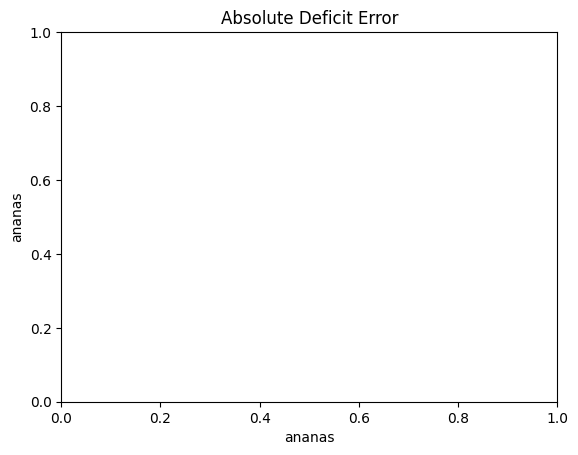

In [52]:
num_cells = test_dataset.num_cells
num_fields = len(test_dataset)//num_cells
field_indices = list(range(num_fields))
random.shuffle(field_indices)

for idx in field_indices:
    ti, ct, ws, wake_field, predicted_wake_field = test_dataset.get_parameters_for_plotting_univariate(model, idx)
    
    plotting.plot_maps(test_dataset.X_grid, test_dataset.Y_grid, wake_field, predicted_wake_field, ti, ct, ws, error_to_plot='absolute')